# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Made Vidyatma Adhi Krisna
- Email: krisnahmbtn@gmail.com  
- Id Dicoding: adhi_krisna

## Persiapan

### Menyiapkan library yang dibutuhkan

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib


### Menyiapkan data yang akan diguanakan

## Data Understanding

In [508]:
#Load Dataset
df = pd.read_csv('data/employee_data.csv')
display(df.shape)
display(df.head())
display(df.info())
display(df.describe())



(1470, 35)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

None

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [509]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] 
if not missing_values.empty:
    print("Missing values in the dataset:")
    print(missing_values)
else:
    print("No missing values in the dataset.")
    
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Number of duplicate rows: {duplicates}")
else:
    print("No duplicate rows in the dataset.")

Missing values in the dataset:
Attrition    412
dtype: int64
No duplicate rows in the dataset.


In [510]:
# remove missing values 
# attrition merupakan kategorikal (yes/no) jadi tidak bisa diisi direplace valuenya karena akan menyebabkan bias
before_drop = df.shape[0]
print(f"Jumlah baris sebelum dihapus: {before_drop}")
df.dropna(subset=['Attrition'], inplace=True)
#Tampilkan jumlah baris yang dihapus
print(f"Jumlah baris setelah dihapus: {df.shape[0]}")

# double check mIssing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] 
if not missing_values.empty:
    print("Missing values in the dataset:")
    print(missing_values)
else:
    print("No missing values in the dataset.")


Jumlah baris sebelum dihapus: 1470
Jumlah baris setelah dihapus: 1058
No missing values in the dataset.


In [511]:
# EDA
# Kolom yang bisa dihitung secara numerik (untuk statistik & visualisasi outlier)
numeric_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
# Fitur ordinal (nilai memiliki urutan)
ordinal_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance'
]

# Fitur nominal (tidak ada urutan)
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                'JobRole', 'MaritalStatus', 'OverTime']


# Kolom yang harus dihapus karena tidak berguna
drop_columns = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']

print("Fitur Numerik:\n", numeric_features)
print("\n Fitur Ordinal:\n", ordinal_cols)
print("\n Fitur Nominal:\n", nominal_cols)
print("\nFitur yang akan dihapus pada saat data preprocessing:\n", drop_columns)


Fitur Numerik:
 ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

 Fitur Ordinal:
 ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

 Fitur Nominal:
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Fitur yang akan dihapus pada saat data preprocessing:
 ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']


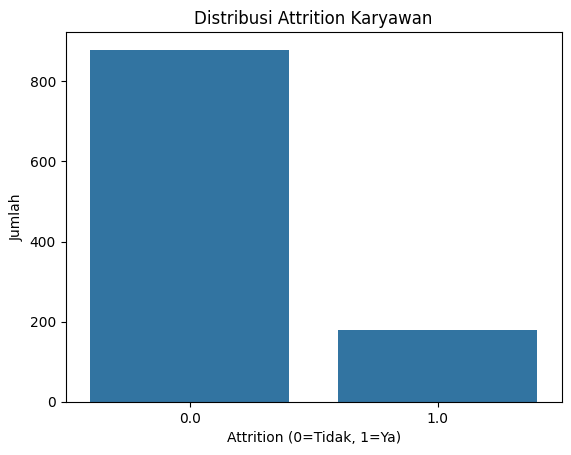

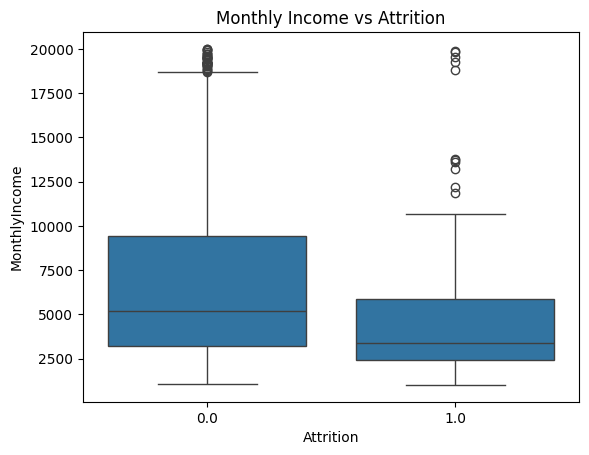

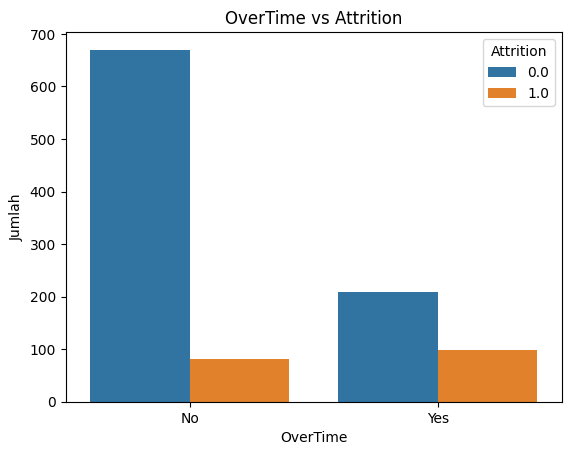

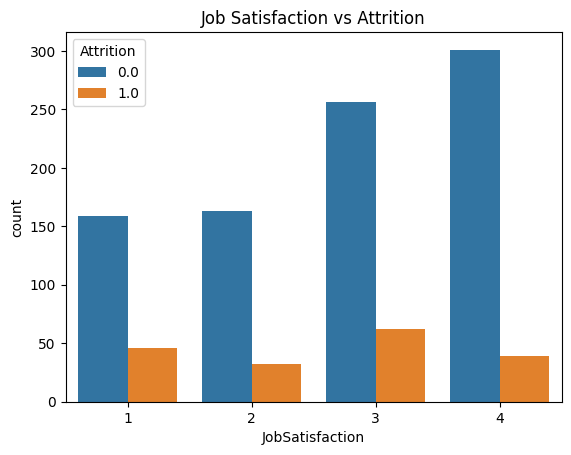

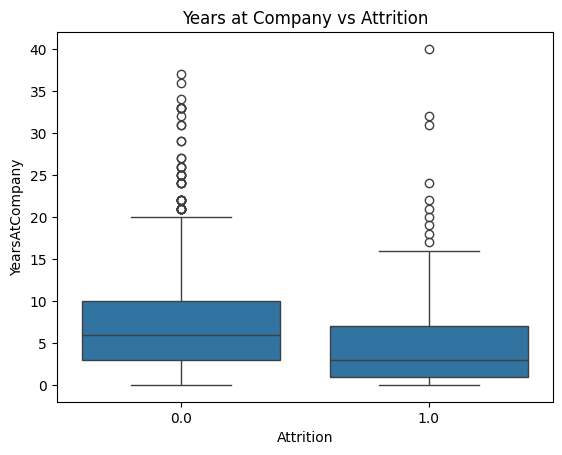

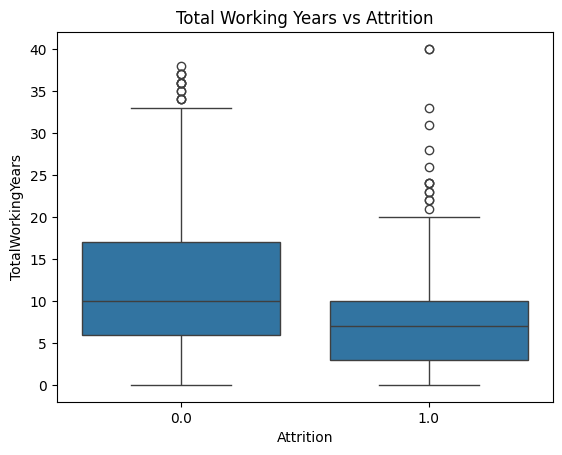

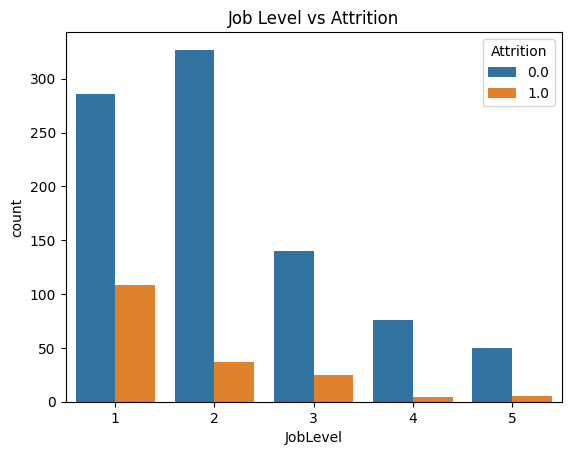

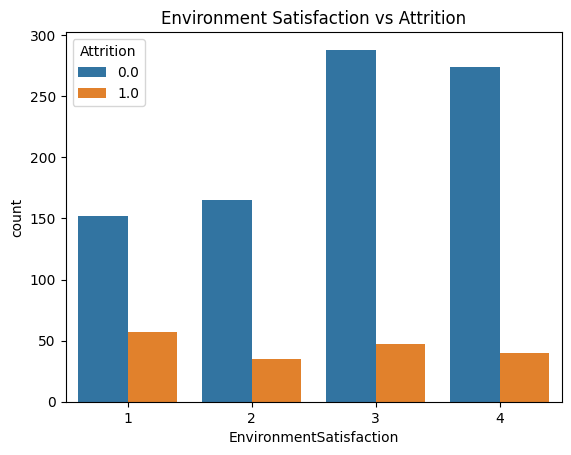

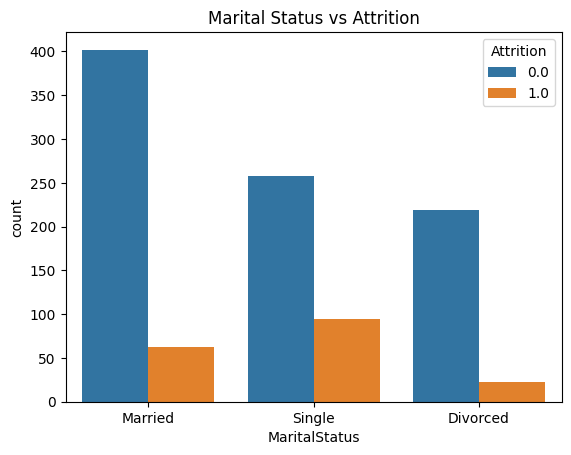

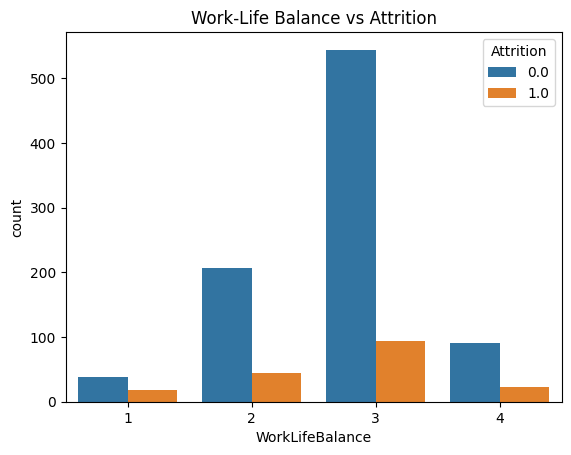

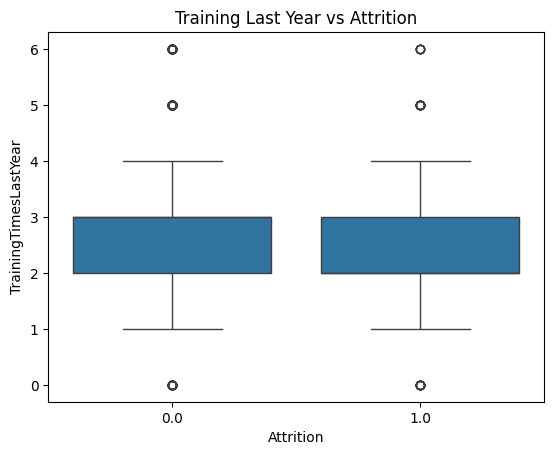

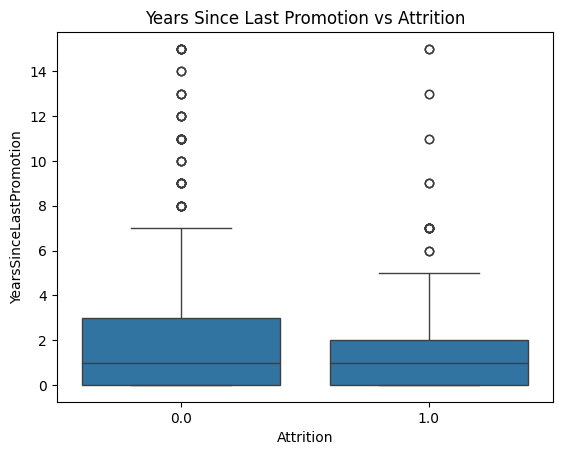

In [512]:
#EDA
# Visualisasi Distribusi Attrition
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition Karyawan')
plt.xlabel('Attrition (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah')
plt.show()

# Pendapatan Bulanan VS Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# OverTime vs Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')
plt.xlabel('OverTime')
plt.ylabel('Jumlah')
plt.show()

# JobSatisfaction vs Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()

# YearsAtCompany vs Attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Attrition')
plt.show()

# TotalWorkingYears vs Attrition
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Total Working Years vs Attrition')
plt.show()

# JobLevel vs Attrition
sns.countplot(x='JobLevel', hue='Attrition', data=df)
plt.title('Job Level vs Attrition')
plt.show()

# EnvironmentSatisfaction vs Attrition
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Environment Satisfaction vs Attrition')
plt.show()

# MaritalStatus vs Attrition
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Marital Status vs Attrition')
plt.show()

# WorkLifeBalance vs Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Work-Life Balance vs Attrition')
plt.show()

# TrainingTimesLastYear vs Attrition
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=df)
plt.title('Training Last Year vs Attrition')
plt.show()

# YearsSinceLastPromotion vs Attrition
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Years Since Last Promotion vs Attrition')
plt.show()



In [513]:
outlier_summary = {}

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = {
        'outlier_count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }


# Tampilkan hasil
print("Deteksi Outlier Berdasarkan IQR:")
for col, val in outlier_summary.items():
    if(val['outlier_count'] > 0):
        print(f"{col}: (range: {val['lower_bound']:.2f} to {val['upper_bound']:.2f})")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Min: {df[col].min():.2f}")
        print(f"  Outliers: {val['outlier_count']}")
    else:
        print(f"{col}: Tidak ada outlier yang terdeteksi.")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Min: {df[col].min():.2f}")
    
    
# Data yang outliers mungkin akan diperbaiki dengan cara di replace dengan KNN pada data preprocessing

Deteksi Outlier Berdasarkan IQR:
Age: Tidak ada outlier yang terdeteksi.
  Mean: 37.06
  Median: 36.00
  Std Dev: 9.41
  Min: 18.00
DailyRate: Tidak ada outlier yang terdeteksi.
  Mean: 809.54
  Median: 817.50
  Std Dev: 408.48
  Min: 102.00
DistanceFromHome: Tidak ada outlier yang terdeteksi.
  Mean: 8.98
  Median: 7.00
  Std Dev: 8.04
  Min: 1.00
HourlyRate: Tidak ada outlier yang terdeteksi.
  Mean: 65.64
  Median: 65.00
  Std Dev: 20.32
  Min: 30.00
MonthlyIncome: (range: -5854.12 to 17490.88)
  Mean: 6625.95
  Median: 4903.50
  Std Dev: 4837.70
  Min: 1009.00
  Outliers: 64
MonthlyRate: Tidak ada outlier yang terdeteksi.
  Mean: 14267.28
  Median: 14201.00
  Std Dev: 7048.08
  Min: 2094.00
NumCompaniesWorked: (range: -3.50 to 8.50)
  Mean: 2.71
  Median: 2.00
  Std Dev: 2.52
  Min: 0.00
  Outliers: 43
PercentSalaryHike: Tidak ada outlier yang terdeteksi.
  Mean: 15.16
  Median: 14.00
  Std Dev: 3.64
  Min: 11.00
TotalWorkingYears: (range: -9.00 to 31.00)
  Mean: 11.44
  Median: 10

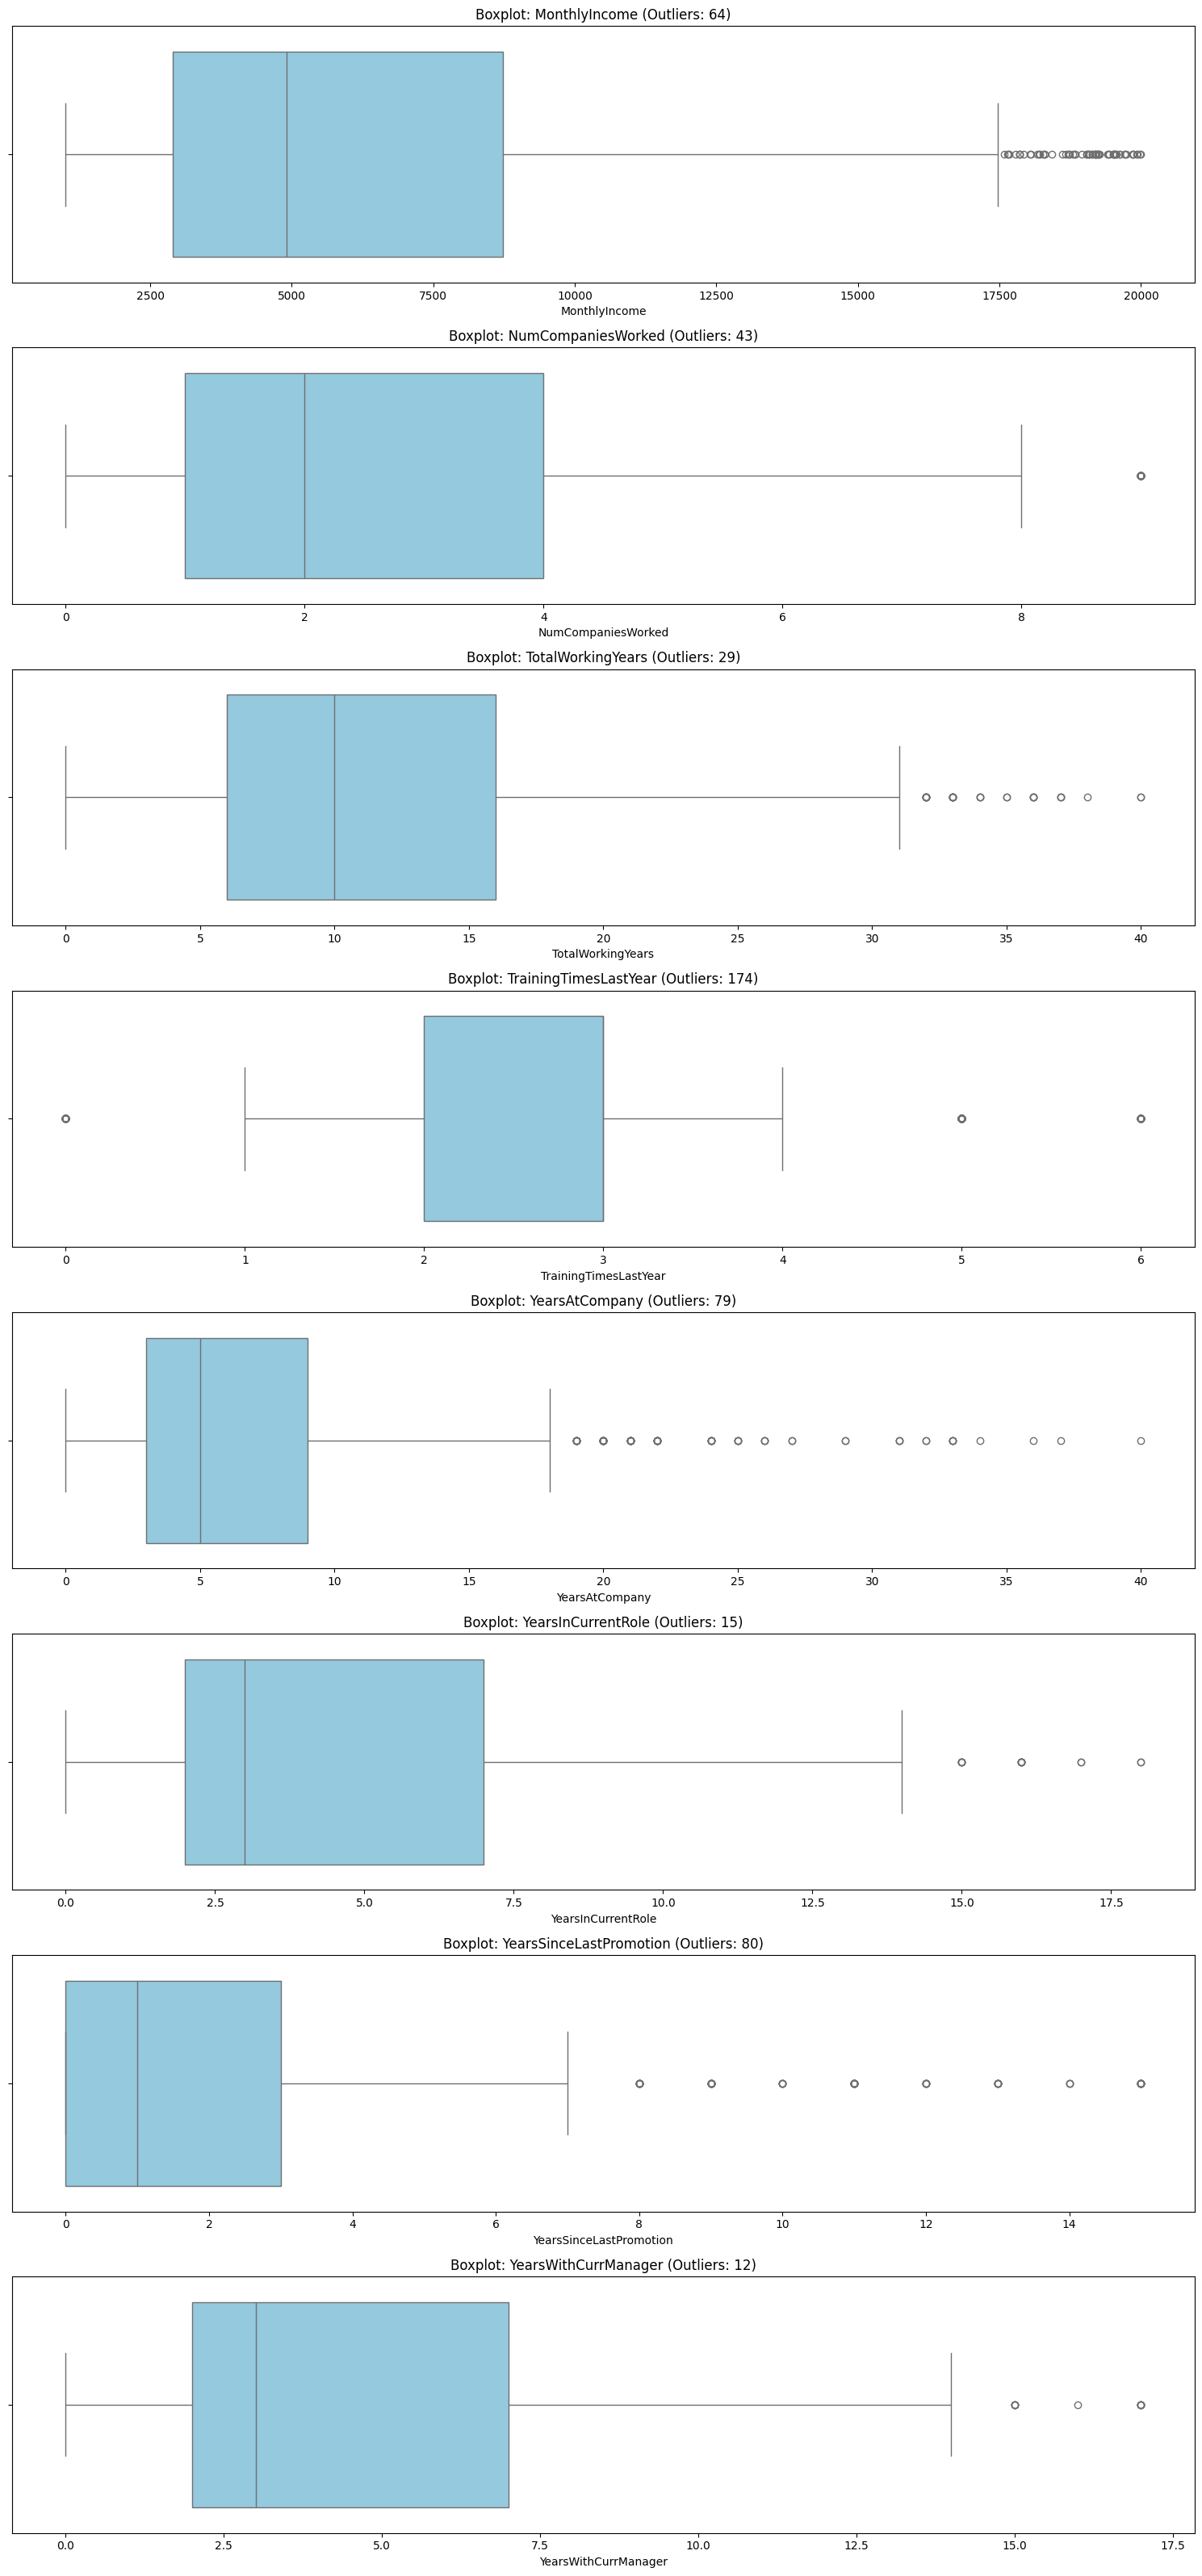

In [514]:
# Buat list fitur yang punya outliers
cols_with_outliers = [col for col, val in outlier_summary.items() if val['outlier_count'] > 0]

# Plot boxplot satu per satu
plt.figure(figsize=(15, len(cols_with_outliers) * 4))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(len(cols_with_outliers), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot: {col} (Outliers: {outlier_summary[col]['outlier_count']})")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


## Data Preparation / Preprocessing

In [515]:
# Drop columns yang tidak diperlukan (sudah didefinisikan sebelumnya saat EDA)
print(f"Menghapus kolom: {drop_columns}")
df.drop(columns=drop_columns, inplace=True)

Menghapus kolom: ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']


In [516]:
df.to_csv("data/attrition_dashboard_data.csv", index=False)

Penanganan Outliers (Ragu harus dilakukan atau tidak karena tidak seharusnya data seperti gaji bulanan karyawan, lama bekerja, dsb diimputasi atau di drop hanya karena Outliers)
.
Dikhawatirkan menyebabkan data yang tidak akurat dan tidak real

In [517]:
# # Replace outliers dengan imputasi KNN
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=3)

# # Tandai outlier dengan np.nan dulu
# for col in numeric_features:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan

# # Imputasi dengan KNN
# df[numeric_features] = imputer.fit_transform(df[numeric_features])



In [518]:
# df_clean = df.copy()

# for col in numeric_features:
#     Q1 = df_clean[col].quantile(0.25)
#     Q3 = df_clean[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Keep only data within IQR range
#     df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# print(f"Jumlah data yang dihapus dari data yang masih outliers: {df.shape[0] - df_clean.shape[0]} baris.")
# print(f"Jumlah data setelah membersihkan outliers: {df_clean.shape[0]} baris dari {df.shape[0]} asli.")


In [519]:
# Pisahkan label (y)
df.dropna(subset=['Attrition'], inplace=True)  # drop baris tanpa label
X = df.drop('Attrition', axis=1)
y = df['Attrition'].astype(int)

In [520]:
# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(), ordinal_cols),
        ('nom', OneHotEncoder(drop='first'), nominal_cols)
    ]
)

# Pipeline dengan Random Forest
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Modeling

In [521]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
pipeline.fit(X_train, y_train)

# Predict & evaluate
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       176
           1       1.00      0.11      0.20        36

    accuracy                           0.85       212
   macro avg       0.92      0.56      0.56       212
weighted avg       0.87      0.85      0.79       212

Confusion Matrix:
 [[176   0]
 [ 32   4]]


In [522]:
# Simpan model
joblib.dump(pipeline, 'model/model.pkl')
print("Model pipeline saved.")

Model pipeline saved.


## Evaluation

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

Test Accuracy: 0.8491


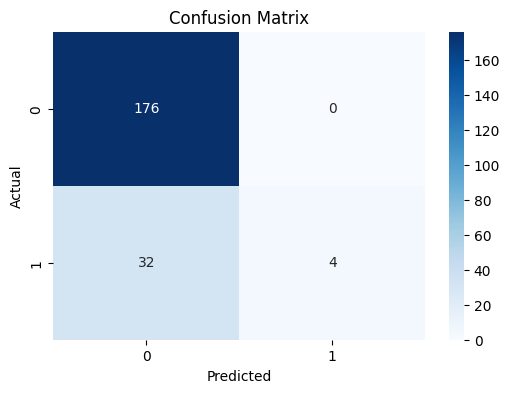

In [524]:
# Print accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 🔍 Feature Importance Insight

Berdasarkan model Random Forest, fitur yang paling berkontribusi terhadap prediksi attrition adalah **Age**, **MonthlyIncome**, dan **TotalWorkingYears**. Hal ini menunjukkan bahwa faktor usia, penghasilan, dan pengalaman kerja total sangat memengaruhi keputusan karyawan untuk tetap atau keluar dari perusahaan. Fitur seperti **OverTime**, **DistanceFromHome**, dan **JobInvolvement** juga termasuk dalam 15 besar, yang memperkuat pentingnya keseimbangan kerja dan beban kerja dalam retensi karyawan.


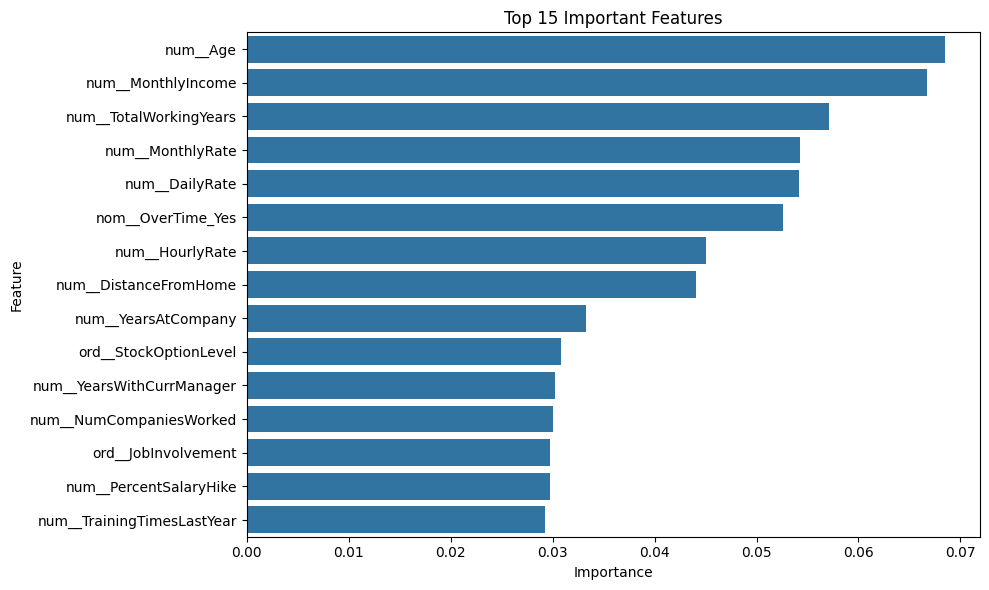

In [525]:
# Ambil fitur dari pipeline
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
importances = pipeline.named_steps['classifier'].feature_importances_

# Buat DataFrame dan tampilkan fitur penting
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(15), x='Importance', y='Feature')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()
